In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
from text2topics import reports
from text2topics import utilities
from text2topics import clean
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = utilities.create_spelling_dictionary(wordlist_dir, wordlists)

In [7]:
title = "WMH"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/WMH/baseline

Average verified rate: 0.9316708765632767

Average of error rates: 0.07061265580057527

Total token count: 939453



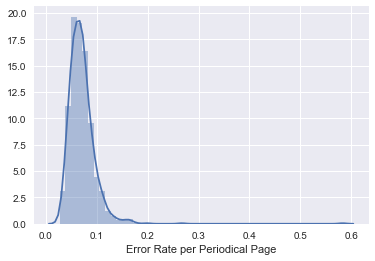

In [10]:
stats = reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = reports.get_errors_summary( stats )
reports.top_errors( errors_summary, 500 )

[('-', 1687),
 ('m', 1646),
 ('w', 1492),
 ('g', 1421),
 ('d', 1246),
 ('e', 1229),
 ('¥', 881),
 ('re-', 816),
 ('con-', 748),
 ('tion', 679),
 ('r', 664),
 ('n', 633),
 ('in-', 539)]

## Review Special Character Use

In [12]:
reports.tokens_with_special_characters(errors_summary)

[('¥', 881),
 (')', 432),
 ('(', 368),
 ('ñ', 248),
 ('/', 171),
 ('ñthe', 100),
 ('_', 81),
 ('presidentña', 75),
 ('numbess)in', 70),
 ('¡', 65),
 ('educationñprof', 62),
 ('numbers)in', 62),
 ('%', 62),
 ('treasurerñe', 61),
 ('secretaryñm', 61),
 ('ñmargaret', 58),
 ('(to', 52),
 ('\\', 41),
 ('presidentñs', 38),
 ('ñelder', 37),
 ('treasñjennie', 35),
 ('ñselected', 35),
 ('presidentñm', 32),
 ('ña', 32),
 ('*', 31),
 ('//', 25),
 ('numbers)', 25),
 ('ã', 24),
 ('ñwe', 23),
 ('¢', 22),
 ('ô', 21),
 ('(the', 20),
 ('ñi', 20),
 ('numbeps)in', 19),
 ('numbees)in', 17),
 ('(b)', 16),
 ('ñthat', 16),
 ('(concluded', 16),
 ('¥the', 16),
 ('ñdied', 16),
 ('secretaryñs', 15),
 ('(a)', 15),
 ('ñhattie', 15),
 ('treasurerñd', 15),
 ('ñbrother', 13),
 ('(and', 13),
 ('ñand', 12),
 ('i)', 12),
 ('(ps', 12),
 ('(see', 12),
 ('(c)', 11),
 ('ñin', 11),
 ('(tithe)', 11),
 ('in¥', 11),
 ('ñmiss', 11),
 ('(john', 10),
 ('¥of', 9),
 ('quartetñ', 9),
 ('ñno', 9),
 ('ñdr', 8),
 ('ñfrom', 8),
 ('ñmrs',

## Correction 1 -- Normalize Characters

In [14]:
# %load shared_elements/normalize_characters.py
prev = "baseline"
cycle = "correction1"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/WMH/correction1

Average verified rate: 0.9377967276021958

Average of error rates: 0.0643058485139022

Total token count: 938150



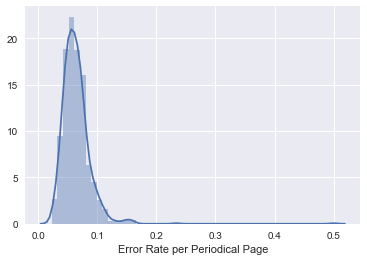

In [17]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('m', 1749),
 ('-', 1720),
 ('w', 1503),
 ('g', 1434),
 ('e', 1307),
 ('d', 1276),
 ('re-', 816),
 ('con-', 750),
 ('tion', 684),
 ('r', 681),
 ('n', 644),
 ('in-', 539),
 ("'", 507),
 ('be-', 471),
 ('f', 444),
 ('t', 381),
 ('de-', 377),
 ('com-', 339),
 ('ex-', 332),
 ('michi-', 328),
 ('th', 289),
 ('sab-', 285),
 ('ment', 283),
 ('ence', 267),
 ('en-', 233),
 ('peo-', 226),
 ('sabbath-', 223),
 ('ly', 220),
 ('ference', 212),
 ('ple', 207),
 ('confer-', 207),
 ('pre-', 203),
 ('tions', 189),
 ('ad-', 186),
 ('dis-', 178),
 ('at-', 173),
 ('oo', 172),
 ('im-', 167),
 ('mis-', 164),
 ('un-', 163),
 ('meet-', 162),
 ('ers', 162),
 ('ac-', 161),
 ('pro-', 153),
 ('per-', 146),
 ('ber', 137),
 ('io', 117),
 ('ap-', 116),
 ('ren', 114),
 ('ary', 113)]

## Correction 2 -- Connect Line Endings

In [20]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/WMH/correction2

Average verified rate: 0.9726863553068523

Average of error rates: 0.029485139022051778

Total token count: 915147



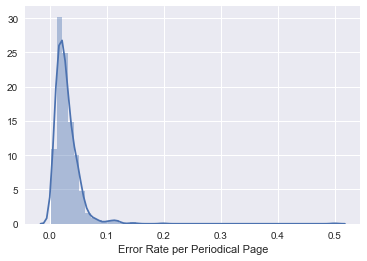

In [23]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('m', 1747),
 ('-', 1700),
 ('w', 1503),
 ('g', 1434),
 ('e', 1307),
 ('d', 1275),
 ('r', 680),
 ('n', 644),
 ("'", 507),
 ('f', 443),
 ('t', 377),
 ('th', 283),
 ('oo', 171),
 ('sabbathschool', 163),
 ('io', 117),
 ('mt', 108),
 ('k', 106),
 ('co', 102),
 ('ro', 94),
 ('wm', 82),
 ('numbess', 75),
 ('u', 69),
 ("'field", 67),
 ("canvassers'", 58),
 ('--', 50),
 ('x', 46),
 ("'the", 44),
 ('horr', 39),
 ("the'", 38),
 ('rd', 33),
 ('blendon', 32),
 ('mid-summer', 32),
 ('brower', 31),
 ("f'd", 30),
 ('-the', 29),
 ('harnden', 29),
 ('mchugh', 29),
 ('nd', 28),
 ('seventhday', 28),
 ('cleora', 27),
 ('ex', 26),
 ('tion', 25),
 ('sabbathschools', 23),
 ('q', 23),
 ('nunica', 23),
 ('con-', 22),
 ("'to", 22),
 ('vowyla', 21),
 ('-and', 21),
 ('loth', 20)]

## Correction 3 -- Remove extra dashes

In [26]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

WMH19030128-V01-04-page1.txt: [('-', ''), ('-', ''), ('-', ''), ('labor-', 'labor'), ('-', '')]
WMH19030128-V01-04-page2.txt: [('-Prpartittrrit.', 'Prpartittrrit.')]
WMH19030128-V01-04-page3.txt: [('-', ''), ('HER-', 'HER')]
WMH19030128-V01-04-page4.txt: [('-', ''), ('Mich-', 'Mich')]
WMH19030204-V01-05-page1.txt: [('-', ''), ('fin-', 'fin'), ('-', ''), ('-', '')]
WMH19030204-V01-05-page2.txt: [('purit-', 'purit')]
WMH19030211-V01-06-page1.txt: [('-Is', 'Is'), ('-', ''), ('-', '')]
WMH19030211-V01-06-page3.txt: [('partic-', 'partic')]
WMH19030311-V01-10-page2.txt: [('ambush-', 'ambush')]
WMH19030311-V01-10-page3.txt: [('morn-', 'morn')]
WMH19030311-V01-10-page4.txt: [('en-', 'en'), ('TRAVIS.-', 'TRAVIS.'), ('WILBUR.-', 'WILBUR.')]
WMH19030415-V01-15-page2.txt: [('IMPRES-', 'IMPRES'), ('corn-', 'corn')]
WMH19030415-V01-15-page3.txt: [('-', ''), ('-air', 'air')]
WMH19030415-V01-15-page4.txt: [('HER-', 'HER')]
WMH19030506-V01-18-page1.txt: [('COM-', 'COM')]
WMH19030506-V01-18-page2.txt: [

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/WMH/correction3

Average verified rate: 0.9762576375579471

Average of error rates: 0.02556951102588687

Total token count: 915705



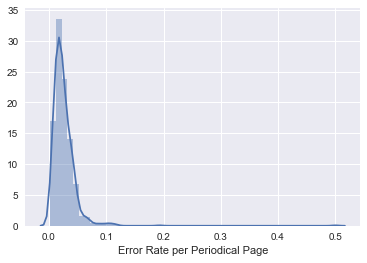

In [30]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [31]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('m', 1749),
 ('w', 1503),
 ('g', 1437),
 ('e', 1313),
 ('d', 1278),
 ('r', 688),
 ('n', 645),
 ("'", 511),
 ('f', 444),
 ('t', 382),
 ('th', 283),
 ('co', 172),
 ('oo', 171),
 ('sabbathschool', 163),
 ('io', 120),
 ('mt', 108),
 ('k', 107),
 ('ro', 96),
 ('wm', 82),
 ('numbess', 75),
 ('re', 71),
 ('u', 69),
 ("'field", 67),
 ("canvassers'", 58),
 ('x', 46),
 ("'the", 44),
 ('horr', 39),
 ("the'", 38),
 ('rd', 33),
 ('blendon', 32),
 ('ex', 32),
 ('brower', 31),
 ('harnden', 30),
 ("f'd", 30),
 ('mchugh', 29),
 ('seventhday', 28),
 ('nd', 28),
 ('cleora', 27),
 ('tion', 25),
 ('nunica', 23),
 ('sabbathschools', 23),
 ('q', 23),
 ("'to", 22),
 ('-', 21),
 ('vowyla', 21),
 ('al', 21),
 ('z', 20),
 ('loth', 20),
 ('fd', 20),
 ('michi', 20)]

## Correction 4 -- Remove extra quotation marks

In [33]:
# %load shared_elements/remove_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

WMH19030513-V01-19-page1.txt: [("'Alarmed", 'Alarmed')]
WMH19030520-V01-20-page4.txt: [("'born", 'born')]
WMH19030527-V01-21-page4.txt: [("'An", 'An')]
WMH19030610-V01-23-page1.txt: [("'Evangelical", 'Evangelical')]
WMH19030610-V01-23-page2.txt: [("'promotes", 'promotes')]
WMH19030610-V01-23-page4.txt: [("'Rem", 'Rem'), ("'Rotes", 'Rotes')]
WMH19030624-V01-25-page4.txt: [("'dews", 'dews'), ("'notes", 'notes')]
WMH19030701-V01-26-page4.txt: [("'news", 'news'), ("'Pews", 'Pews'), ("'Rotes", 'Rotes')]
WMH19030708-V01-27-page2.txt: [("'Department", 'Department')]
WMH19030708-V01-27-page4.txt: [("'school", 'school'), ("'Mews", 'Mews'), ("'Rotes", 'Rotes')]
WMH19030715-V01-28-page1.txt: [("'Tis", 'Tis')]
WMH19030715-V01-28-page3.txt: [("'.Died", '.Died')]
WMH19030715-V01-28-page4.txt: [("'Flews", 'Flews'), ("'Hews", 'Hews')]
WMH19030722-V01-29-page2.txt: [("'and", 'and')]
WMH19030722-V01-29-page4.txt: [("'Flews", 'Flews'), ("'Motes", 'Motes'), ("'Pews", 'Pews')]
WMH19030930-V01-39-page3.txt:

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/WMH/correction4

Average verified rate: 0.9771874993174814

Average of error rates: 0.024615532118887822

Total token count: 915726



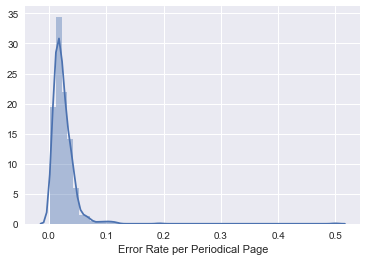

In [36]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [37]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('m', 1750),
 ('w', 1506),
 ('g', 1439),
 ('e', 1317),
 ('d', 1279),
 ('r', 688),
 ('n', 645),
 ("'", 490),
 ('f', 446),
 ('t', 384),
 ('th', 283),
 ('co', 172),
 ('oo', 171),
 ('sabbathschool', 163),
 ('io', 120),
 ('mt', 108),
 ('k', 107),
 ('ro', 96),
 ('wm', 83),
 ('numbess', 75),
 ('re', 71),
 ('u', 70),
 ("canvassers'", 58),
 ('x', 46),
 ('horr', 39),
 ("the'", 38),
 ('rd', 33),
 ('blendon', 32),
 ('ex', 32),
 ('brower', 31),
 ('harnden', 30),
 ("f'd", 30),
 ('mchugh', 29),
 ('seventhday', 28),
 ('nd', 28),
 ('cleora', 27),
 ('tion', 25),
 ('nunica', 23),
 ('sabbathschools', 23),
 ('q', 23),
 ('-', 22),
 ('vowyla', 21),
 ('al', 21),
 ('loth', 20),
 ('z', 20),
 ('fd', 20),
 ('michi', 20),
 ('psa', 20),
 ('ti', 20),
 ('ne', 19)]

## Correction 5 -- Rejoin Split Words

In [39]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction5"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

WMH19030128-V01-04-page4.txt: [('co', 'operate')]
WMH19030415-V01-15-page2.txt: [('IMPRES', 'SIONS')]
WMH19030415-V01-15-page4.txt: [('Verm', 'on')]
WMH19030506-V01-18-page3.txt: [('sugg', 'estion')]
WMH19030513-V01-19-page3.txt: [('th', 'in')]
WMH19030520-V01-20-page3.txt: [('co', 'operating')]
WMH19030603-V01-22-page1.txt: [('TES', 'TAMENT')]
WMH19030603-V01-22-page3.txt: [('AB', 'OLISHED')]
WMH19030603-V01-22-page4.txt: [('th', 'at'), ('co', 'laborers')]
WMH19030610-V01-23-page1.txt: [('pre', 'eminently')]
WMH19030610-V01-23-page3.txt: [('unscript', 'ural')]
WMH19030624-V01-25-page4.txt: [('Mc', 'Bride')]
WMH19030715-V01-28-page1.txt: [('mo', 'at')]
WMH19030715-V01-28-page2.txt: [('th', 'e')]
WMH19030715-V01-28-page3.txt: [('wa', 's'), ('developmen', 't')]
WMH19030722-V01-29-page3.txt: [('Kellog', 'g')]
WMH19031028-V01-43-page1.txt: [('ca', 'use')]
WMH19031118-V01-46-page1.txt: [('co', 'operate')]
WMH19031118-V01-46-page3.txt: [('lig', 'and')]
WMH19040113-V02-03-page3.txt: [('AC', '

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/WMH/correction5

Average verified rate: 0.9775893748620843

Average of error rates: 0.02419558964525408

Total token count: 915414



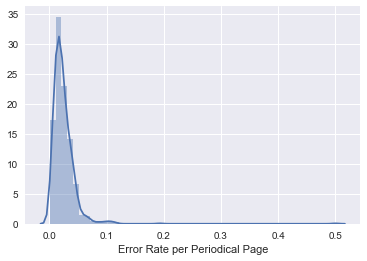

In [42]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [43]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('m', 1749),
 ('w', 1503),
 ('g', 1438),
 ('e', 1316),
 ('d', 1279),
 ('r', 687),
 ('n', 642),
 ("'", 490),
 ('f', 446),
 ('t', 381),
 ('th', 275),
 ('oo', 171),
 ('sabbathschool', 163),
 ('io', 115),
 ('mt', 108),
 ('k', 107),
 ('co', 101),
 ('ro', 96),
 ('wm', 83),
 ('numbess', 75),
 ('u', 70),
 ("canvassers'", 58),
 ('x', 46),
 ('horr', 39),
 ("the'", 38),
 ('rd', 33),
 ('blendon', 32),
 ('brower', 31),
 ('ex', 30),
 ('harnden', 30),
 ("f'd", 30),
 ('mchugh', 29),
 ('re', 29),
 ('seventhday', 28),
 ('nd', 28),
 ('cleora', 27),
 ('q', 23),
 ('nunica', 23),
 ('sabbathschools', 23),
 ('-', 22),
 ('tion', 21),
 ('vowyla', 21),
 ('fd', 20),
 ('psa', 20),
 ('z', 20),
 ('loth', 20),
 ('numbeps', 19),
 ('ioo', 19),
 ('drury', 18),
 ('hoffstra', 18)]

## Correction 6 -- Rejoin Split Words II

In [45]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    errors = reports.identify_errors(tokens, spelling_dictionary)

    replacements = clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

WMH19030415-V01-15-page4.txt: [('Confer', 'ence'), ('Gene', 'al'), ('Vermon', 'tville')]
WMH19030520-V01-20-page4.txt: [('depart', 'ment')]
WMH19030603-V01-22-page2.txt: [('CON', 'FERENCE')]
WMH19030701-V01-26-page1.txt: [('DEPART', 'MENT')]
WMH19030722-V01-29-page1.txt: [('r', 'esented')]
WMH19030722-V01-29-page4.txt: [('cam', 'pmeeting')]
WMH19031118-V01-46-page1.txt: [('mission', 'ary')]
WMH19031118-V01-46-page3.txt: [('in', 'stil')]
WMH19040127-V02-04-page4.txt: [('improve', 'ments')]
WMH19040203-V02-05-page4.txt: [('at', 'tention'), ('INSTRUCT', 'ORS')]
WMH19040210-V02-06-page4.txt: [('San', 'itarium')]
WMH19040224-V02-08-page1.txt: [('priv', 'ilege')]
WMH19040224-V02-08-page4.txt: [('S', 'hool')]
WMH19040302-V02-09-page2.txt: [('atone', 'ment')]
WMH19040323-V02-12-page1.txt: [('in', 'terest')]
WMH19040330-V02-13-page4.txt: [('maili', 'ng')]
WMH19040413-V02-15-page3.txt: [('an', 'nouncing')]
WMH19040413-V02-15-page4.txt: [('SOUTH', 'ERN')]
WMH19040420-V02-16-page1.txt: [('treasur'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/WMH/correction6

Average verified rate: 0.977728102578558

Average of error rates: 0.024010546500479388

Total token count: 915279



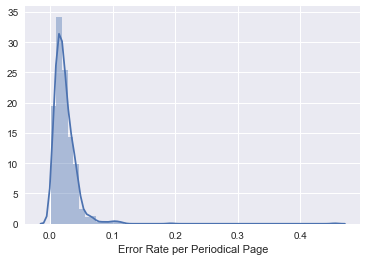

In [48]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [49]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('m', 1746),
 ('w', 1502),
 ('g', 1438),
 ('e', 1316),
 ('d', 1278),
 ('r', 684),
 ('n', 641),
 ("'", 490),
 ('f', 446),
 ('t', 378),
 ('th', 273),
 ('oo', 171),
 ('sabbathschool', 163),
 ('io', 115),
 ('mt', 108),
 ('k', 105),
 ('co', 98),
 ('ro', 94),
 ('wm', 83),
 ('numbess', 75),
 ('u', 70),
 ("canvassers'", 58),
 ('x', 46),
 ('horr', 39),
 ("the'", 38),
 ('rd', 33),
 ('blendon', 32),
 ('brower', 31),
 ('ex', 30),
 ('harnden', 30),
 ("f'd", 30),
 ('mchugh', 29),
 ('seventhday', 28),
 ('cleora', 27),
 ('nd', 26),
 ('q', 23),
 ('nunica', 23),
 ('sabbathschools', 23),
 ('-', 22),
 ('tion', 21),
 ('vowyla', 21),
 ('re', 21),
 ('fd', 20),
 ('psa', 20),
 ('z', 20),
 ('loth', 20),
 ('numbeps', 19),
 ('ioo', 19),
 ('drury', 18),
 ('hoffstra', 18)]

## Review Remaining Errors

In [50]:
reports.docs_with_high_error_rate(summary)

[('WMH19081111-V06-45-page5.txt', 0.455)]

In [52]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in reports.docs_with_high_error_rate(summary) if x[1] > 0.2]

utilities.open_original_docs(doc_keys, directories['cycle'])

Opened files: 

WMH19081111-V06-45-page5.txt



High error document is handwritten.

In [54]:
reports.long_errors(errors_summary, min_length=15)

(['heaven-appointed',
  'tionofourownpeople',
  'niialtioiaaavaliwailio',
  'unimpressionable',
  'enjoyable-service',
  'carefully-arranged',
  'disconnectedfrom',
  'csuperintendents',
  'sabbath-meetings',
  'distinguishingbetween',
  'great-grandchildren',
  'iqiiiidiiiniinii',
  'stick-to-it-iveness',
  'juippliympamtuuju',
  'ponderousdocument',
  'influentiarwriters',
  'blackstring-around-the-neck',
  'self-examination',
  'congregegational',
  'securingappointments',
  'dwellingconveniences',
  'all--sabbath-school',
  'thought-producing',
  'danish-norwegian',
  'sleepfsfuicffeicse',
  'counter-campaign',
  'stoop-shouldered',
  'disfeliowshipped',
  'desire--expression',
  'soul-encouraging',
  'abundantresources',
  'hethatreapethgatherethfruituntolifeeternal',
  'instrumentterial',
  'fruituntolifeeternal',
  'ceremonieswholly',
  'responstbilities',
  'commandment-keeping',
  'encouragingteachers',
  'bookslavebeenhandledmostly',
  'relief-of-schools',
  'great-responsibi

## Correction 7 -- Remove Long Error Tokens

In [57]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = cycle
cycle = "correction7"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(clean.check_for_repeating_characters(tokens, "i|I"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

WMH19050104-V03-01-page4.txt: [('IIIIIIVIIIIIIMUNIMMI', ' ')]
WMH19060321-V04-12-page1.txt: [("IIIIIIIIINIIffffr'", ' ')]
WMH19080729-V06-31-page1.txt: [('IQIIIIdIIINIINII', ' ')]


## Correction 8 -- Separate Squashed Words

In [59]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction8"

directories = utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = utilities.readfile(directories['prev'], filename)
    clean.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = utilities.readfile(directories['prev'], filename)

    text = utilities.strip_punct(content)
    tokens = utilities.tokenize_text(text)
    
    wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
    maxword = max(len(x) for x in sorted_list_of_words)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = clean.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if clean.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

WMH19030603-V01-22-page3.txt: [('distinguishingbetween', 'distinguish ing between')]
WMH19040106-V02-02-page1.txt: [('Christianindividuals', 'Christian individuals')]
WMH19040928-V02-35-page2.txt: [('NIIALTIOIAAAVALIWAILIO', 'N I I A L T I O I A A A V A L I W A I L I O')]
WMH19050201-V03-04-page2.txt: [('irrilirrIMIIIMIPTIMPIIIR', 'ir r i l i r r I M I I I M I P T I M P I I I R')]
WMH19060117-V04-03-page1.txt: [('HETHATREAPETHGATHERETHFRUITUNTOLIFEETERNAL', 'HE THAT REAPETH GATHERETH FRUIT UNTO LIFE ETERNAL')]
WMH19060718-V04-28-page2.txt: [('encouragingteachers', 'encouraging teachers')]
WMH19060725-V04-29-page1.txt: [('FRUITUNTOLIFEETERNAL', 'FRUIT UNTO LIFE ETERNAL')]
WMH19060919-V04-36-page1.txt: [('comparativelysmall', 'comparatively small')]
WMH19080408-V06-15-page1.txt: [('bookslavebeenhandledmostly', 'book slave been handled mostly')]
WMH19080722-V06-30-page2.txt: [('securingappointments', 'securing appointments')]
WMH19080909-V06-36-page1.txt: [('HETHATREAPETHGATHERETHFRUITUNT

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/WMH/correction8

Average verified rate: 0.9777330102496761

Average of error rates: 0.024005752636625122

Total token count: 915346



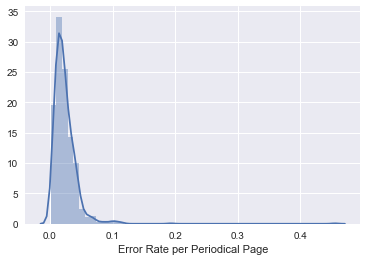

In [62]:
# %load shared_elements/summary.py
summary = reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [63]:
# %load shared_elements/top_errors.py
errors_summary = reports.get_errors_summary( summary )
reports.top_errors( errors_summary, 10 )[:50]

[('m', 1749),
 ('w', 1503),
 ('g', 1438),
 ('e', 1316),
 ('d', 1278),
 ('r', 688),
 ('n', 642),
 ("'", 490),
 ('f', 446),
 ('t', 380),
 ('th', 273),
 ('oo', 171),
 ('sabbathschool', 163),
 ('io', 115),
 ('mt', 108),
 ('k', 105),
 ('co', 98),
 ('ro', 94),
 ('wm', 83),
 ('numbess', 75),
 ('u', 70),
 ("canvassers'", 58),
 ('x', 46),
 ('horr', 39),
 ("the'", 38),
 ('rd', 33),
 ('blendon', 32),
 ('brower', 31),
 ('ex', 30),
 ('harnden', 30),
 ("f'd", 30),
 ('mchugh', 29),
 ('seventhday', 28),
 ('cleora', 27),
 ('nd', 26),
 ('q', 23),
 ('nunica', 23),
 ('sabbathschools', 23),
 ('-', 22),
 ('tion', 21),
 ('vowyla', 21),
 ('re', 21),
 ('fd', 20),
 ('psa', 20),
 ('z', 20),
 ('loth', 20),
 ('numbeps', 19),
 ('ioo', 19),
 ('drury', 18),
 ('hoffstra', 18)]